In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import multibind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '../annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cuda:0


In [80]:
df = mb.bindome.datasets.PBM.gcn4_dream_v11()
df = df.sort_values('intensity', ascending=False).reset_index(drop=True)

df = df[['seq', 'intensity']]
df.columns = ['seq', 0]


In [90]:
data = df.copy() # head(10000)
# data = df.sample(n=10000)

In [91]:
data[1] = data[0]
data[0] = np.median(data[1])

data[0] = np.log(data[0])
data[1] = np.log(data[1])

In [105]:
data['seq'] = data['seq'].str[:-23]

In [92]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 1

In [106]:
print('loading object (# entries)', data.shape[0])
dataset = mb.datasets.SelexDataset(data, n_rounds=1, enr_series=True)
train = tdata.DataLoader(dataset=dataset, batch_size=10000, shuffle=True)

loading object (# entries) 41904


In [26]:
# train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

In [94]:
train.dataset.n_batches

1

In [86]:
# train.dataset.rounds

# rounds 1
# batches 1
# enr_series True
next w 14
kernel to optimize 0

Freezing kernels
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0
mono grad 1 None
di grad 1 None


before kernel optimization.
log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)
activities
[[[1. 1.]
  [1. 1.]]]


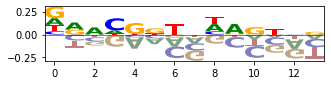

optimizing using <class 'torch.optim.adam.Adam'>
Epoch:  1, Loss: 93.3352 , best epoch: -1 secs per epoch: 0.343 s
Epoch: 11, Loss: 83.9409 , best epoch: 9 secs per epoch: 0.518 s
Epoch: 21, Loss: 47.3052 , best epoch: 19 secs per epoch: 0.537 s
Epoch: 31, Loss: 1.7813 , best epoch: 29 secs per epoch: 0.555 s
Epoch: 41, Loss: 0.0848 , best epoch: 36 secs per epoch: 0.553 s
Epoch: 51, Loss: 0.0771 , best epoch: 47 secs per epoch: 0.547 s
Epoch: 61, Loss: 0.0777 , best epoch: 59 secs per epoch: 0.542 s
Epoch: 71, Loss: 0.0782 , best epoch: 59 secs per epoch: 0.545 s
Epoch: 81, Loss: 0.0773 , best epoch: 74 secs per epoch: 0.545 s
Epoch: 90, Loss: 0.0776 , best epoch: 74 secs per epoch: 0.551 s
early stop!
after kernel opt / before shift optim.
log_etas
Parameter containing:
tensor([[ 2.1943, -2.1943]], device='cuda:0', requires_grad=True)
activities
[[[1.         0.18031308]
  [1.         1.        ]]]


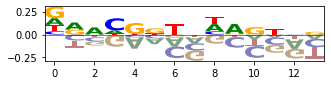

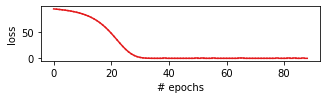

after shift optimz model
log_etas
Parameter containing:
tensor([[ 2.1943, -2.1943]], device='cuda:0', requires_grad=True)
activities
[[[1.         0.18031308]
  [1.         1.        ]]]


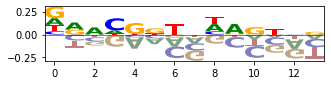

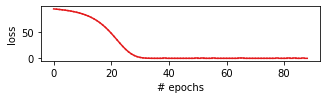


kernel to optimize 1

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 1
mono grad 1 None
di grad 1 None


before kernel optimization.
log_etas
Parameter containing:
tensor([[ 2.1943, -2.1943]], device='cuda:0', requires_grad=True)
activities
[[[1.         0.18031308]
  [1.         1.        ]]]


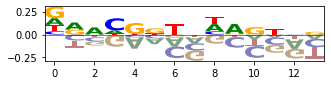

optimizing using <class 'torch.optim.adam.Adam'>
Epoch:  1, Loss: 0.1855 , best epoch: -1 secs per epoch: 0.478 s
Epoch: 11, Loss: 0.0549 , best epoch: 9 secs per epoch: 0.598 s
Epoch: 21, Loss: 0.0543 , best epoch: 19 secs per epoch: 0.575 s
Epoch: 31, Loss: 0.0546 , best epoch: 23 secs per epoch: 0.563 s
Epoch: 41, Loss: 0.0538 , best epoch: 38 secs per epoch: 0.561 s
Epoch: 51, Loss: 0.0530 , best epoch: 38 secs per epoch: 0.561 s
Epoch: 54, Loss: 0.0535 , best epoch: 38 secs per epoch: 0.563 s
early stop!
after kernel opt / before shift optim.
log_etas
Parameter containing:
tensor([[ 2.1952, -2.1952]], device='cuda:0', requires_grad=True)
activities
[[[1.         0.18031308]
  [1.0000024  0.9954162 ]]]


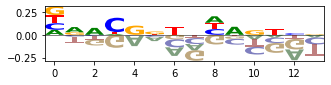

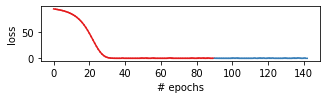


optimize_motif_shift (first)...left
mono grad 1 None
di grad 1 None
optimizing using <class 'torch.optim.adam.Adam'>
Epoch:  1, Loss: -12.8908 , best epoch: -1 secs per epoch: 0.510 s
Epoch: 11, Loss: -12.8986 , best epoch: 7 secs per epoch: 0.663 s
Epoch: 21, Loss: -12.8969 , best epoch: 19 secs per epoch: 0.620 s
Epoch: 31, Loss: -12.8979 , best epoch: 22 secs per epoch: 0.594 s
Epoch: 38, Loss: -12.8936 , best epoch: 22 secs per epoch: 0.589 s
early stop!

right
mono grad 1 None
di grad 1 None
optimizing using <class 'torch.optim.adam.Adam'>
Epoch:  1, Loss: -12.8996 , best epoch: -1 secs per epoch: 0.531 s
Epoch: 11, Loss: -12.9003 , best epoch: 1 secs per epoch: 0.755 s
Epoch: 21, Loss: -12.8999 , best epoch: 11 secs per epoch: 0.748 s
Epoch: 27, Loss: -12.9018 , best epoch: 11 secs per epoch: 0.755 s
early stop!
curr=0.0529 left=-12.8995 right=-12.9057
action: right


optimize_motif_shift (again)...left
mono grad 1 None
di grad 1 None
optimizing using <class 'torch.optim.adam.Ad

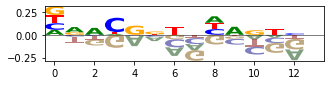

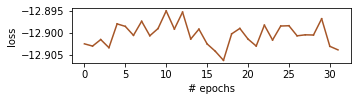

In [107]:
# assign batch and data type

# data['batch'] = 0
# data['is_count_data'] = 1
# n_batches=3

model_by_k_next, res_next = mb.tl.train_iterative(train, device, min_w=14, max_w=15, n_kernels=2, criterion=mb.tl.MSELoss())
# res = []
# model_by_k = {}
